Este conjunto de datos proporciona información sobre cómo los distintos hábitos de estudio, estilos de aprendizaje y factores externos influyen en el rendimiento de los estudiantes. Se cubren detalles sobre las horas de estudio de los estudiantes, la participación en el aprendizaje en línea, las calificaciones de los exámenes, porcentanjes de asistencia, nivel de estrés y otros factores que que se cree que afectan el éxito académico.
Objetico :
Analizar cómo diferentes factores influyen en los resultados de los exámenes y comprender el impacto de los hábitos de estudio, los estilos de aprendizaje y las actividades externas en el desempeño académico
Hipótesis
1 - La cantidad de horas de sueño nocturno están inversamente relacionadas con el nivel de estrés, a mayor hs de sueño menor nivel de estres.
2 - Las horas de estudio semanales están directamente relacionadas con el porcentaje de tareas completadas por el estudiante y con las puntuaciones en los exámenes.
Pregunntas
La edad de los estudiantes influye en el desempeño académico ?
El sexo influye no tiene relación con las notas en los examenes


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
df_Desempe_estudiantes = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/student_performance_large_dataset.csv')
df_Desempe_estudiantes.head()

,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
0,S00001,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C
1,S00002,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D
2,S00003,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D
3,S00004,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B
4,S00005,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C


In [4]:
df_Desempe_estudiantes.dropna()

,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
0,S00001,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C
1,S00002,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D
2,S00003,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D
3,S00004,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B
4,S00005,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,S09996,20,Male,30,Auditory,6,Yes,62,58,76,Yes,Medium,17,6,C
9996,S09997,23,Female,16,Visual,8,Yes,54,84,86,Yes,Medium,6,5,B
9997,S09998,26,Male,23,Visual,3,Yes,54,40,70,No,Medium,20,8,D
9998,S09999,18,Male,41,Reading/Writing,7,Yes,66,45,90,Yes,Low,6,8,D


In [5]:
df_Desempe_estudiantes.drop_duplicates(keep='first', inplace=True)

In [6]:
df_Desempe_estudiantes[df_Desempe_estudiantes['Age'] > 100]


,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade


In [7]:
df_Desempe_estudiantes[df_Desempe_estudiantes['Age'] < 18]

,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade


No hay valores errónes en edades

In [8]:
df_Desempe_estudiantes['Gender'].value_counts()

,count
Gender,
Female,4846
Male,4748
Other,406


In [9]:
df_Desempe_estudiantes = df_Desempe_estudiantes.query('Gender in ["Female","Male"]')

In [10]:
df_Desempe_estudiantes['Gender'].value_counts()

,count
Gender,
Female,4846
Male,4748


In [11]:
df_Desempe_estudiantes['Study_Hours_per_Week'] = df_Desempe_estudiantes['Study_Hours_per_Week'].astype(int)
df_Desempe_estudiantes['Online_Courses_Completed'] = df_Desempe_estudiantes['Online_Courses_Completed'].astype(int)
df_Desempe_estudiantes['Gender'] = df_Desempe_estudiantes['Gender'].astype(str)

In [12]:
%matplotlib inline

In [13]:
df_Desempe_estudiantes.dtypes

,0
Student_ID,object
Age,int64
Gender,object
Study_Hours_per_Week,int64
Preferred_Learning_Style,object
Online_Courses_Completed,int64
Participation_in_Discussions,object
Assignment_Completion_Rate (%),int64
Exam_Score (%),int64
Attendance_Rate (%),int64


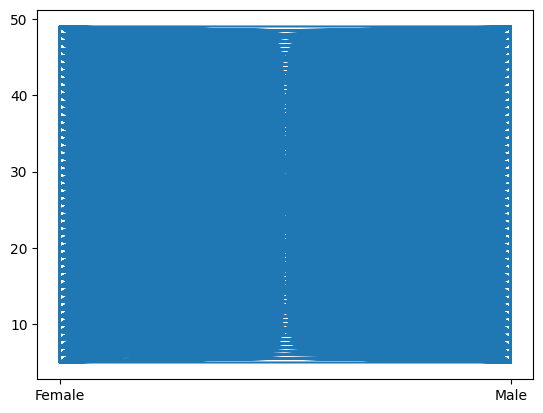

In [14]:
plt.plot(df_Desempe_estudiantes['Gender'], df_Desempe_estudiantes['Study_Hours_per_Week'])
plt.show()

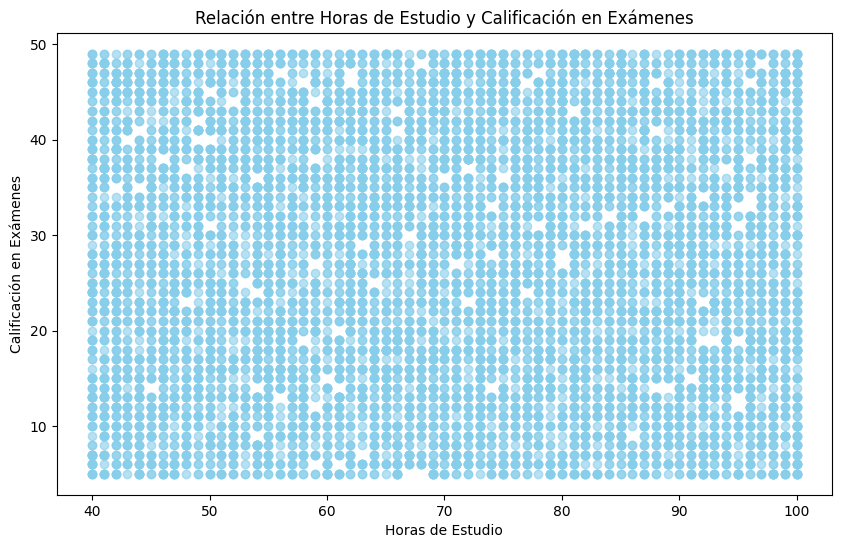

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter( df_Desempe_estudiantes['Exam_Score (%)'],df_Desempe_estudiantes['Study_Hours_per_Week'], color='skyblue', alpha=0.6)
plt.title('Relación entre Horas de Estudio y Calificación en Exámenes')
plt.xlabel('Horas de Estudio')
plt.ylabel('Calificación en Exámenes')
#plt.grid(True)
#plt.show()
#sns.regplot(x=df_Desempe_estudiantes['Study_Hours_per_Week'], y=df_Desempe_estudiantes['Exam_Score (%)'], scatter=False, color="orange", line_kws={"linewidth": 2, "label": "Tendencia"})
plt.show()




NameError: name 'mu' is not defined

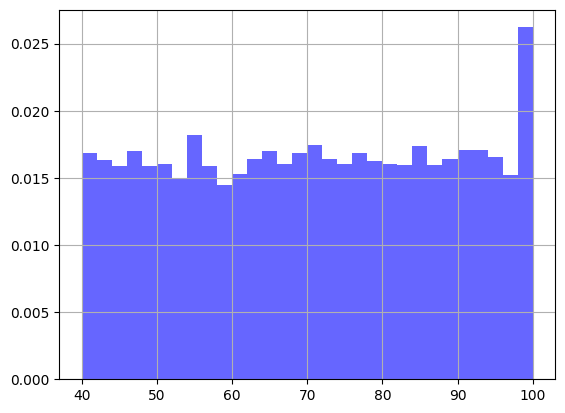

In [ ]:
# Calcular la media y la desviación estándar
media = df_Desempe_estudiantes['Exam_Score (%)'].mean()
desviacion_estandar = df_Desempe_estudiantes['Exam_Score (%)'].std()

# Visualizar la distribución con un histograma
df_Desempe_estudiantes['Exam_Score (%)'].hist(bins=30, density=True, alpha=0.6, color='b')

# Curva de distribución normal teórica
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), 'r')

plt.title('Distribución Normal')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.show()